# Explore here

It's recommended to use this notebook for exploration purposes.

In [143]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:

url_tesla = 'https://ycharts.com/companies/TSLA/revenues'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url_tesla, headers=headers).text
print(response)










<!doctype html>
<html lang="en" ng-jq>
    <head>
        <title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>

        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer>
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>


        
        <script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createEl

In [90]:

soup = BeautifulSoup(response, 'html.parser' )


In [89]:
date_all = soup.find_all("td", limit=100)

In [93]:
# Lista de fechas y valores sin modificar
list_all = []
for fecha in date_all:
    list_all.append(fecha.get_text(strip=True))
print(list_all)



['June 30, 2024', '25.50B', 'March 31, 2024', '21.30B', 'December 31, 2023', '25.17B', 'September 30, 2023', '23.35B', 'June 30, 2023', '24.93B', 'March 31, 2023', '23.33B', 'December 31, 2022', '24.32B', 'September 30, 2022', '21.45B', 'June 30, 2022', '16.93B', 'March 31, 2022', '18.76B', 'December 31, 2021', '17.72B', 'September 30, 2021', '13.76B', 'June 30, 2021', '11.96B', 'March 31, 2021', '10.39B', 'December 31, 2020', '10.74B', 'September 30, 2020', '8.771B', 'June 30, 2020', '6.036B', 'March 31, 2020', '5.985B', 'December 31, 2019', '7.384B', 'September 30, 2019', '6.303B', 'June 30, 2019', '6.35B', 'March 31, 2019', '4.541B', 'December 31, 2018', '7.226B', 'September 30, 2018', '6.824B', 'June 30, 2018', '4.002B', 'March 31, 2018', '3.409B', 'December 31, 2017', '3.288B', 'September 30, 2017', '2.985B', 'June 30, 2017', '2.790B', 'March 31, 2017', '2.696B', 'December 31, 2016', '2.285B', 'September 30, 2016', '2.298B', 'June 30, 2016', '1.270B', 'March 31, 2016', '1.147B', '

In [133]:
# Listas separadas de fechas y valores sin modificar
date_s = []
value_s = []
for x in range(len(list_all)):
    if x % 2 == 0:
        date_s.append(list_all[x])
    else:
        value_s.append(list_all[x])
   


In [141]:
# Valores modificados 
values_final = []
for item in value_s:
            if 'B' in item:
                values_final.append(float(item.replace('B','')) * 10**9)
            elif 'M' in item:
                values_final.append(float(item.replace('M','')) * 10**6)



In [138]:
# DICT
tesla_revenue = {
    'Dates': date_s,
    'Values': values_final
}

# DATAFRAME
tesla_dataframe = pd.DataFrame(tesla_revenue)


In [175]:
# reemplazo de las ',' por '' y obtención del dataframe final
filt_tesla_dataframe = tesla_dataframe.replace(',', '', regex = True)
filt_tesla_dataframe


,Dates,Values
0,June 30 2024,2.550000e+10
1,March 31 2024,2.130000e+10
2,December 31 2023,2.517000e+10
3,September 30 2023,2.335000e+10
4,June 30 2023,2.493000e+10
5,March 31 2023,2.333000e+10
6,December 31 2022,2.432000e+10
7,September 30 2022,2.145000e+10
8,June 30 2022,1.693000e+10
9,March 31 2022,1.876000e+10


In [176]:
connection = sqlite3.connect('filt_tesla_dataframe')
cursor = connection.cursor()

In [177]:
filt_tesla_dataframe.to_sql('TeslaRevenue', connection, if_exists='replace', index = False)


50

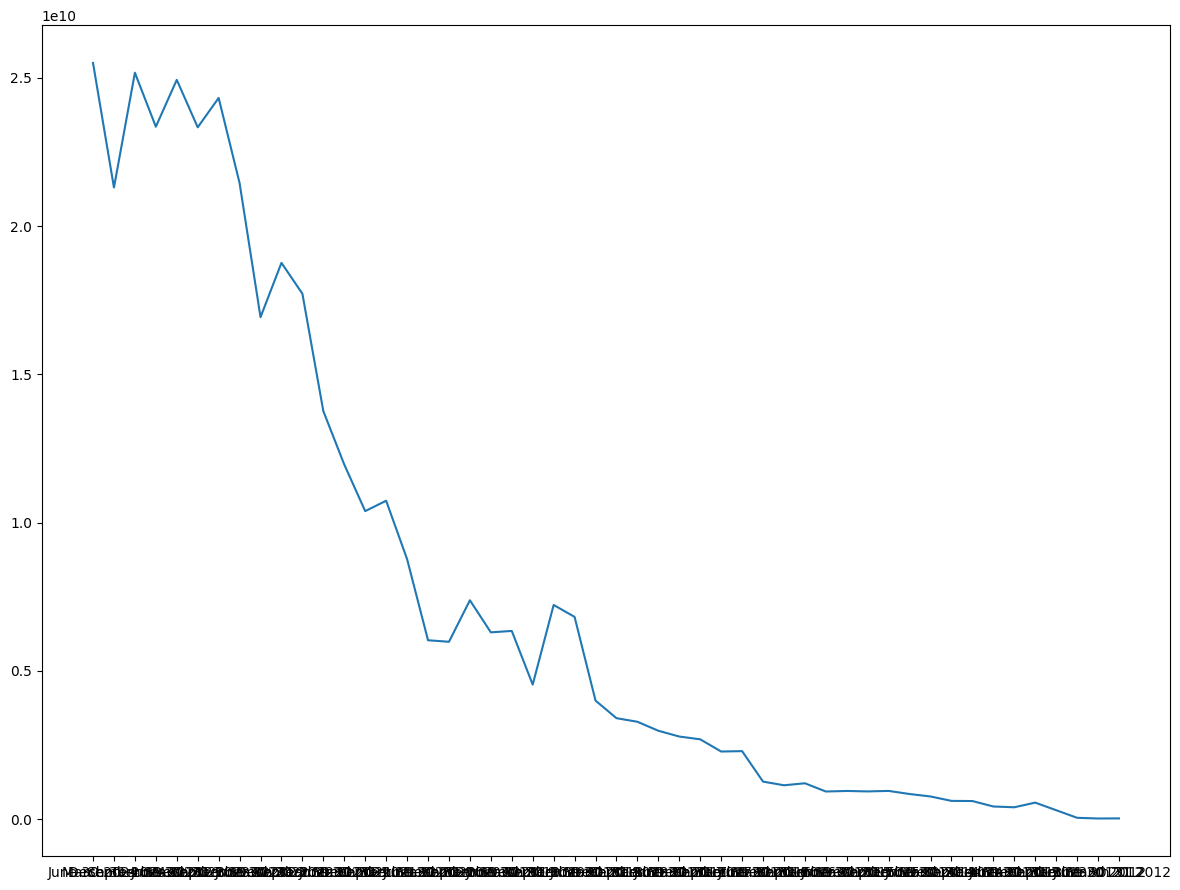

'Hay que modificar las fechas. No se representan bien REVISAR'

In [174]:
plt.figure(figsize = (12,9))
plt.plot(filt_tesla_dataframe['Dates'], filt_tesla_dataframe['Values'])
plt.tight_layout()
plt.show()

'''Hay que modificar las fechas. No se representan bien REVISAR'''